In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
path = "/content/drive/MyDrive/diabetes.csv";
data = pd.read_csv(path)

# Display basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

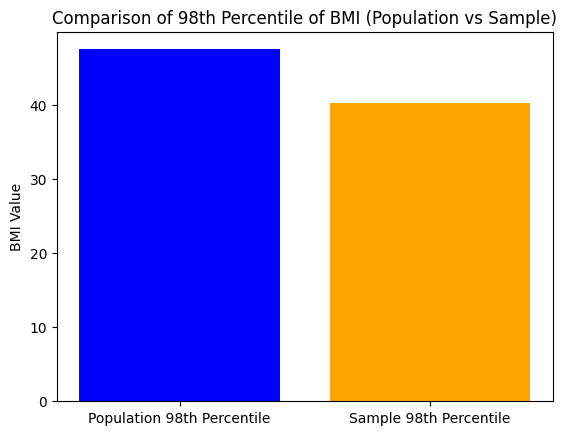

In [15]:
population_percentile_98 = np.percentile(data['BMI'], 98)

# Calculate the 98th percentile of BMI for the sample
sample_percentile_98 = np.percentile(sample['BMI'], 98)

# Create a bar chart for comparison
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile_98, sample_percentile_98]

plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('BMI Value')
plt.title('Comparison of 98th Percentile of BMI (Population vs Sample)')
plt.show()

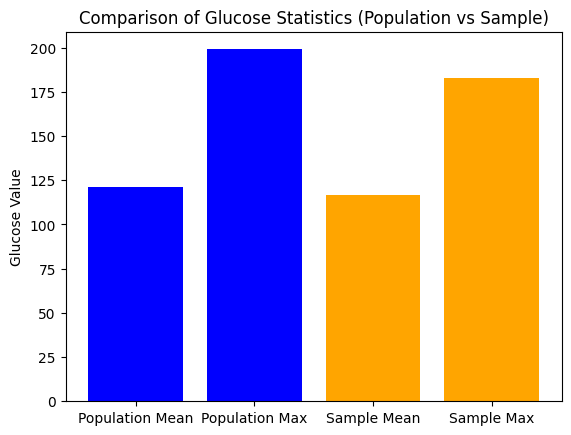

In [16]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/diabetes.csv";
data = pd.read_csv(path)
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Population statistics
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

# Sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Create a bar chart for comparison
import matplotlib.pyplot as plt

labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange'])
plt.ylabel('Glucose Value')
plt.title('Comparison of Glucose Statistics (Population vs Sample)')
plt.show()

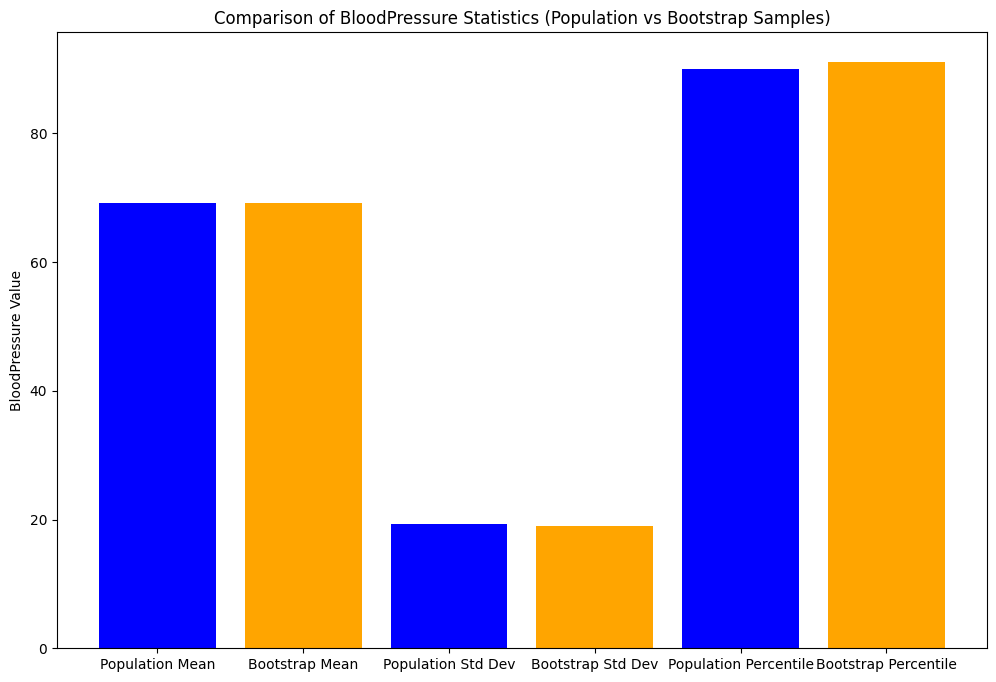

In [19]:
np.random.seed(42)



# Number of bootstrap samples and sample size
num_bootstrap_samples = 500
sample_size = 150

# Initialize arrays to store bootstrap statistics
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

# Perform bootstrap sampling
for _ in range(num_bootstrap_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std_dev = np.std(bootstrap_sample)
    bootstrap_percentile = np.percentile(bootstrap_sample, 95)  # Change percentile as needed

    # Store the calculated statistics
    bootstrap_means.append(bootstrap_mean)
    bootstrap_std_devs.append(bootstrap_std_dev)
    bootstrap_percentiles.append(bootstrap_percentile)

# Calculate population statistics for BloodPressure
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 95)  # Change percentile as needed

# Create bar charts for comparison
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population Percentile', 'Bootstrap Percentile']
values = [population_mean_bp, np.mean(bootstrap_means), population_std_dev_bp, np.mean(bootstrap_std_devs), population_percentile_bp, np.mean(bootstrap_percentiles)]

# Increase the size of the chart
plt.figure(figsize=(12, 8))

plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.ylabel('BloodPressure Value')
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap Samples)')
plt.show()